Deliverable 01

In [ ]:
# Bottom-up DP approach for the Knapsack Problem
def knapsack_bottom_up(weights, values, capacity):
    n = len(weights)
    # Create a DP table with (n+1) rows and (capacity+1) columns
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    # Fill the DP table
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                # Include the item or exclude it
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                # Exclude the item
                dp[i][w] = dp[i - 1][w]

    # The last cell contains the maximum value achievable
    return dp[n][capacity]


# Top-down DP approach with memoization for the Knapsack Problem
def knapsack_top_down(weights, values, capacity):
    n = len(weights)
    # Memoization dictionary
    memo = {}

    # Helper function for recursion with memoization
    def dp(i, w):
        # Base case: no items or no capacity
        if i == 0 or w == 0:
            return 0
        # Check if already computed
        if (i, w) in memo:
            return memo[(i, w)]

        # Recursive case: include the item or exclude it
        if weights[i - 1] <= w:
            include_item = dp(i - 1, w - weights[i - 1]) + values[i - 1]
            exclude_item = dp(i - 1, w)
            memo[(i, w)] = max(include_item, exclude_item)
        else:
            memo[(i, w)] = dp(i - 1, w)

        return memo[(i, w)]

    # Start recursion with all items and full capacity
    return dp(n, capacity)


# Verification function to test both approaches
def verify_knapsack_algorithms():
    # Define test cases (weights, values, and capacity)
    test_cases = [
        ([1, 2, 3, 4], [10, 40, 50, 70], 5),
        ([2, 3, 4, 5], [3, 4, 5, 6], 5),
        ([5, 4, 6, 3], [10, 40, 30, 50], 10),
        ([1, 3, 4, 5], [15, 50, 60, 90], 8),
        ([1, 1, 1], [10, 20, 30], 2)
    ]

    for idx, (weights, values, capacity) in enumerate(test_cases):
        result_bottom_up = knapsack_bottom_up(weights, values, capacity)
        result_top_down = knapsack_top_down(weights, values, capacity)

        # Verify correctness
        assert result_bottom_up == result_top_down, f"Test case {idx + 1} failed!"
        print(f"Test case {idx + 1} passed! Maximum value: {result_bottom_up}")

# Run verification
verify_knapsack_algorithms()


Test case 1 passed! Maximum value: 90
Test case 2 passed! Maximum value: 7
Test case 3 passed! Maximum value: 90
Test case 4 passed! Maximum value: 140
Test case 5 passed! Maximum value: 50


Deliverable 02

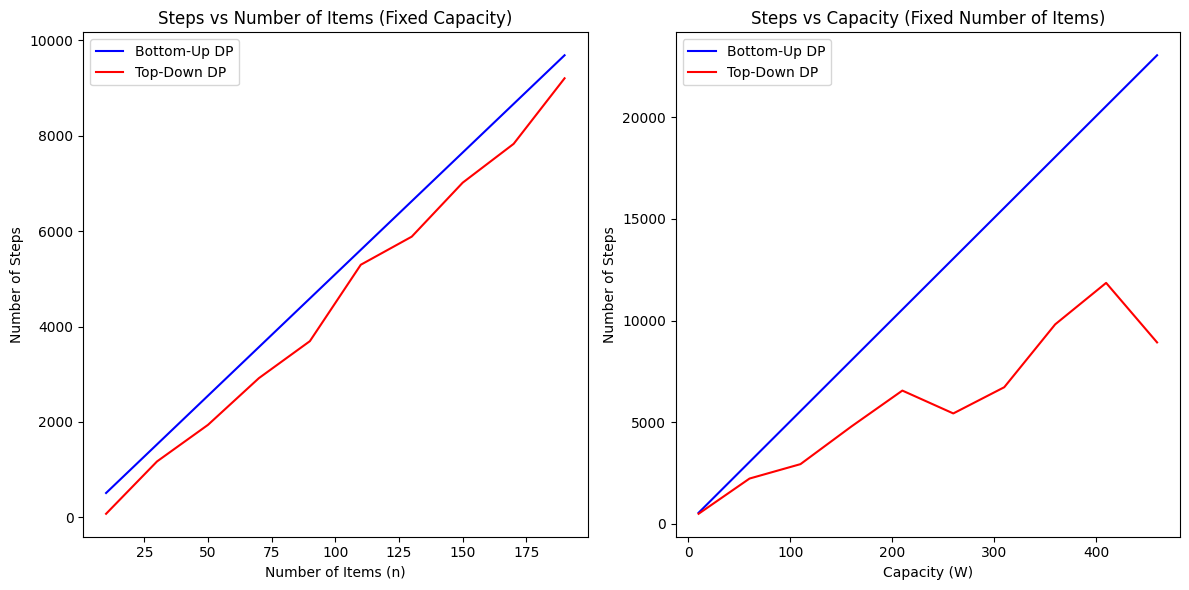

In [ ]:
import random
import matplotlib.pyplot as plt

# Step Counter
class StepCounter:
    def __init__(self):
        self.count = 0

    def increment(self):
        self.count += 1

    def reset(self):
        self.count = 0

# Bottom-up DP approach with step counter
def knapsack_bottom_up(weights, values, capacity, counter):
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            counter.increment()  # Count this step
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]
    return dp[n][capacity]

# Top-down DP approach with memoization and step counter
def knapsack_top_down(weights, values, capacity, counter):
    n = len(weights)
    memo = {}

    def dp(i, w):
        if (i, w) in memo:  # Only increment when solving a new subproblem
            return memo[(i, w)]
        counter.increment()  # Count this step only for new subproblems

        if i == 0 or w == 0:
            return 0

        if weights[i - 1] <= w:
            memo[(i, w)] = max(dp(i - 1, w), dp(i - 1, w - weights[i - 1]) + values[i - 1])
        else:
            memo[(i, w)] = dp(i - 1, w)

        return memo[(i, w)]

    return dp(n, capacity)

# Helper function to generate random input
def generate_random_input(n, W):
    weights = [random.randint(1, W) for _ in range(n)]
    values = [random.randint(1, 100) for _ in range(n)]
    return weights, values

# Performance Measurement Function using step count
def measure_performance(n_values, W_values):
    steps_bottom_up_n = []
    steps_top_down_n = []
    W_fixed = 50  # Fixed capacity W for varying n

    # Measure steps for varying n
    for n in n_values:
        weights, values = generate_random_input(n, W_fixed)
        counter = StepCounter()

        knapsack_bottom_up(weights, values, W_fixed, counter)
        steps_bottom_up_n.append(counter.count)

        counter.reset()
        knapsack_top_down(weights, values, W_fixed, counter)
        steps_top_down_n.append(counter.count)

    n_fixed = 50  # Fixed number of items n
    steps_bottom_up_W = []
    steps_top_down_W = []

    # Measure steps for varying W
    for W in W_values:
        weights, values = generate_random_input(n_fixed, W)
        counter = StepCounter()

        knapsack_bottom_up(weights, values, W, counter)
        steps_bottom_up_W.append(counter.count)

        counter.reset()
        knapsack_top_down(weights, values, W, counter)
        steps_top_down_W.append(counter.count)

    # Plotting the results
    plt.figure(figsize=(12, 6))

    # Plot for varying n
    plt.subplot(1, 2, 1)
    plt.plot(n_values, steps_bottom_up_n, label="Bottom-Up DP", color="blue")
    plt.plot(n_values, steps_top_down_n, label="Top-Down DP", color="red")
    plt.xlabel("Number of Items (n)")
    plt.ylabel("Number of Steps")
    plt.title("Steps vs Number of Items (Fixed Capacity)")
    plt.legend()

    # Plot for varying W
    plt.subplot(1, 2, 2)
    plt.plot(W_values, steps_bottom_up_W, label="Bottom-Up DP", color="blue")
    plt.plot(W_values, steps_top_down_W, label="Top-Down DP", color="red")
    plt.xlabel("Capacity (W)")
    plt.ylabel("Number of Steps")
    plt.title("Steps vs Capacity (Fixed Number of Items)")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Define range for n and W
n_values = list(range(10, 201, 20))   # Vary n from 10 to 200
W_values = list(range(10, 501, 50))   # Vary W from 10 to 500

# Run the performance measurement
measure_performance(n_values, W_values)


Delievrable 03

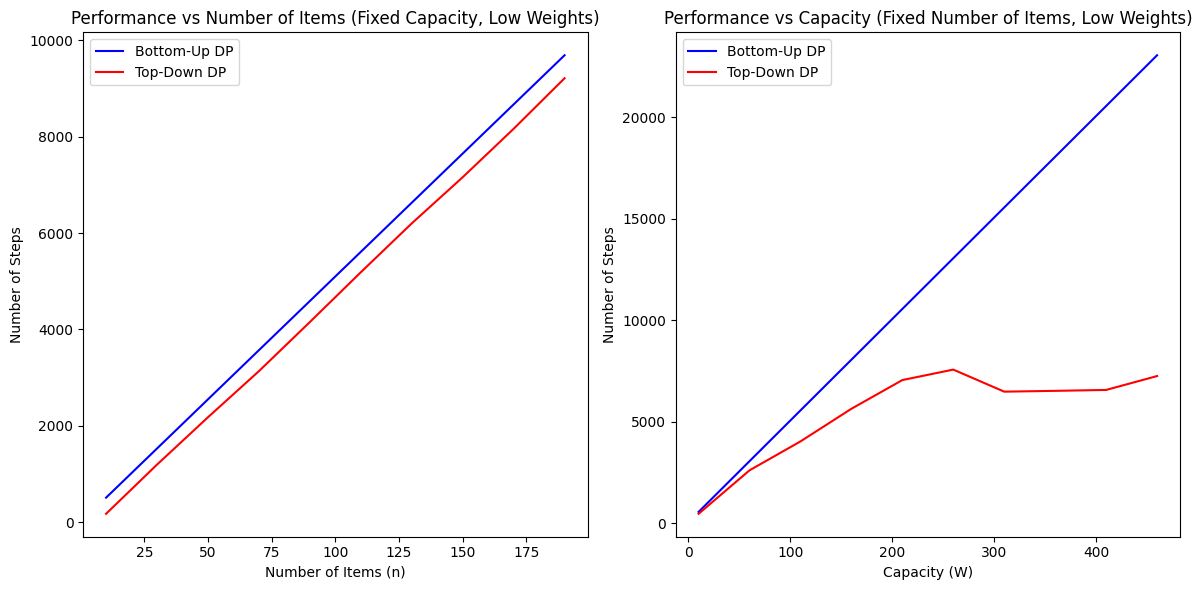

In [ ]:
import random
import time
import matplotlib.pyplot as plt

# Performance Measurement Function for Special Inputs
def measure_performance_special_inputs(n_values, W_values):
    steps_bottom_up_n = []
    steps_top_down_n = []

    # Fixed capacity W for varying n
    W_fixed = 50

    # Measure steps for varying n (size of input)
    for n in n_values:
        # Special inputs with weights between 1 and 10
        weights = [random.randint(1, 10) for _ in range(n)]
        values = [random.randint(1, 100) for _ in range(n)]

        # Measure Bottom-Up DP
        steps = count_steps_bottom_up(weights, values, W_fixed)
        steps_bottom_up_n.append(steps)

        # Measure Top-Down DP
        steps = count_steps_top_down(weights, values, W_fixed)
        steps_top_down_n.append(steps)

    # Fixed number of items n for varying W
    n_fixed = 50
    steps_bottom_up_W = []
    steps_top_down_W = []

    # Measure steps for varying W (capacity)
    for W in W_values:
        # Special inputs with weights between 1 and 10
        weights = [random.randint(1, 10) for _ in range(n_fixed)]
        values = [random.randint(1, 100) for _ in range(n_fixed)]

        # Measure Bottom-Up DP
        steps = count_steps_bottom_up(weights, values, W)
        steps_bottom_up_W.append(steps)

        # Measure Top-Down DP
        steps = count_steps_top_down(weights, values, W)
        steps_top_down_W.append(steps)

    # Plotting the results
    plt.figure(figsize=(12, 6))

    # Plot for varying n
    plt.subplot(1, 2, 1)
    plt.plot(n_values, steps_bottom_up_n, label="Bottom-Up DP", color="blue")
    plt.plot(n_values, steps_top_down_n, label="Top-Down DP", color="red")
    plt.xlabel("Number of Items (n)")
    plt.ylabel("Number of Steps")
    plt.title("Performance vs Number of Items (Fixed Capacity, Low Weights)")
    plt.legend()

    # Plot for varying W
    plt.subplot(1, 2, 2)
    plt.plot(W_values, steps_bottom_up_W, label="Bottom-Up DP", color="blue")
    plt.plot(W_values, steps_top_down_W, label="Top-Down DP", color="red")
    plt.xlabel("Capacity (W)")
    plt.ylabel("Number of Steps")
    plt.title("Performance vs Capacity (Fixed Number of Items, Low Weights)")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Define helper functions for counting steps
def count_steps_bottom_up(weights, values, capacity):
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    step_count = 0
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            step_count += 1
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]
    return step_count

def count_steps_top_down(weights, values, capacity):
    n = len(weights)
    memo = {}
    step_count = 0
    def dp(i, w):
        nonlocal step_count
        if i == 0 or w == 0:
            return 0
        if (i, w) in memo:
            return memo[(i, w)]
        step_count += 1
        if weights[i - 1] <= w:
            memo[(i, w)] = max(dp(i - 1, w), dp(i - 1, w - weights[i - 1]) + values[i - 1])
        else:
            memo[(i, w)] = dp(i - 1, w)
        return memo[(i, w)]
    dp(n, capacity)
    return step_count

# Define range for n and W
n_values = list(range(10, 201, 20))   # Vary n from 10 to 200
W_values = list(range(10, 501, 50))   # Vary W from 10 to 500

# Run the performance measurement for special inputs
measure_performance_special_inputs(n_values, W_values)


Deliverable 04

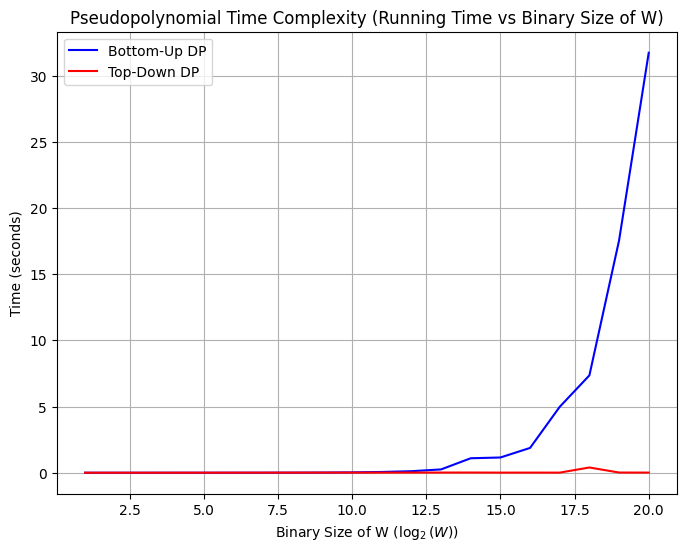

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import math

# Function to measure the runtime for varying W based on binary size
def measure_pseudopolynomial(n_fixed):
    W_values = [2**i for i in range(1, 21)]  # Generating W values as powers of 2 (for increasing binary size)
    times_bottom_up = []
    times_top_down = []

    for W in W_values:
        # Special input with low weights (1 to 10)
        weights = [random.randint(1, 10) for _ in range(n_fixed)]
        values = [random.randint(1, 100) for _ in range(n_fixed)]

        # Measure Bottom-Up DP runtime
        start = time.time()
        knapsack_bottom_up(weights, values, W)
        times_bottom_up.append(time.time() - start)

        # Measure Top-Down DP runtime
        start = time.time()
        knapsack_top_down(weights, values, W)
        times_top_down.append(time.time() - start)

    # Calculate the binary size of W (log base 2)
    log_W_values = [math.log2(W) for W in W_values]

    # Plotting the results
    plt.figure(figsize=(8, 6))
    plt.plot(log_W_values, times_bottom_up, label="Bottom-Up DP", color="blue")
    plt.plot(log_W_values, times_top_down, label="Top-Down DP", color="red")

    plt.xlabel("Binary Size of W ($\log_2(W)$)")
    plt.ylabel("Time (seconds)")
    plt.title("Pseudopolynomial Time Complexity (Running Time vs Binary Size of W)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Fixed number of items n for the test
n_fixed = 50

# Run the performance measurement for pseudopolynomial time complexity illustration
measure_pseudopolynomial(n_fixed)


Bonus Question

Maximum value in knapsack: 7


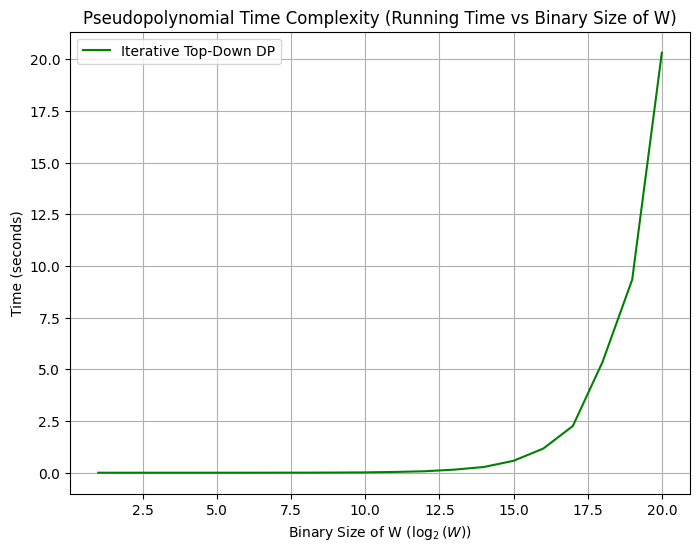

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import math

# Iterative Top-Down Knapsack Implementation
def knapsack_iterative_top_down(weights, values, W):
    n = len(weights)
    dp = [0] * (W + 1)  # Create a 1D DP array to store results for all weights (from 0 to W)

    # Iterate through all items
    for i in range(n):
        # We need to traverse the weight capacity in reverse to avoid overwriting results for the same item
        for w in range(W, weights[i] - 1, -1):
            dp[w] = max(dp[w], dp[w - weights[i]] + values[i])

    return dp[W]  # The maximum value for the full capacity W

# Example test case
weights = [2, 3, 4, 5]  # Weights of items
values = [3, 4, 5, 6]   # Corresponding values of items
W = 5                   # Capacity of the knapsack

# Run the test case
result = knapsack_iterative_top_down(weights, values, W)
print(f"Maximum value in knapsack: {result}")  # Output: 7 (best value with weight <= 5)

# Function to measure and plot runtime for varying W
def measure_pseudopolynomial(n_fixed):
    W_values = [2**i for i in range(1, 21)]  # Generating W values as powers of 2 (for increasing binary size)
    times_iterative_top_down = []

    for W in W_values:
        # Special input with low weights (1 to 10)
        weights = [random.randint(1, 10) for _ in range(n_fixed)]
        values = [random.randint(1, 100) for _ in range(n_fixed)]

        # Measure Iterative Top-Down DP runtime
        start = time.time()
        knapsack_iterative_top_down(weights, values, W)
        times_iterative_top_down.append(time.time() - start)

    # Calculate the binary size of W (log base 2)
    log_W_values = [math.log2(W) for W in W_values]

    # Plotting the results
    plt.figure(figsize=(8, 6))
    plt.plot(log_W_values, times_iterative_top_down, label="Iterative Top-Down DP", color="green")
    plt.xlabel("Binary Size of W ($\log_2(W)$)")
    plt.ylabel("Time (seconds)")
    plt.title("Pseudopolynomial Time Complexity (Running Time vs Binary Size of W)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Fixed number of items n for the test
n_fixed = 50  # You can experiment with different values of n (e.g., 50, 100, etc.)

# Measure the performance of the Iterative Top-Down approach
measure_pseudopolynomial(n_fixed)
